# Álgebra Linear - prática

A célula abaixo gera dados de notas de duas provas, p1 e p2.

## 1. Reduzindo correlações

a) Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
print(df.shape)
df.head()

(50, 2)


,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [3]:
# a) 
# De maneira convencional teriamos

df_conv = df.copy()
df_conv['média'] = df_conv.mean(axis=1)
df_conv['diferença'] = df_conv.p2 - df_conv.p1
df_conv.head()

,p1,p2,média,diferença
0,6.964692,7.943428,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712


In [4]:
# Obtendo os valores (média e diferença) por meio de uma matriz de transformação 

# Matriz de transfomação para definir a média e a diferença 
m = np.array([[.5,.5],
              [-1,1]])

# Ajustando a matriz das notas
m_notas = df[['p1', 'p2']].to_numpy().transpose()
# print(m_notas)

# Obtendo a média e a evolução com base na matriz de transformação 
media, difer = np.matmul(m, m_notas)

# Adicionando os dados ao dataFrame inicial
df_transf = df.copy()
df_transf['média'] = media
df_transf['diferença'] = difer
df_transf.head()

,p1,p2,média,diferença
0,6.964692,7.943428,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712


In [5]:
# b) A correlação

df_transf[['p1', 'p2']].corr()

,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


In [6]:
# c) Correlação entre média e diferença

df_transf[['média', 'diferença']].corr()

,média,diferença
média,1.000000,0.133474
diferença,0.133474,1.000000


##### d)

A correlação entre os dados transformados é sensivelmente menor do que a correlação entre as notas `p1` e `p2`, indicando que tais dados (transformados) estão mais dispersos.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [9]:
# Maneira convencional (sem matrizes)

df_convencional = df.copy()
df_convencional['soma'] = df_convencional['p1'] + df_convencional['p2']
df_convencional['diferença/evolução'] = df_convencional['p2'] - df_convencional['p1']
df_convencional.head()

,p1,p2,soma,diferença/evolução
0,6.964692,7.943428,14.908120,0.978736
1,2.861393,5.099537,7.960930,2.238143
2,2.268515,0.974429,3.242944,-1.294085
3,5.513148,4.474359,9.987507,-1.038788
4,7.194690,8.938402,16.133092,1.743712


In [10]:
# Criando uma cópia do dataframe
df_transf2 = df.copy()
print(df_transf2.shape)
df_transf2.head()

(50, 2)


,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [11]:
# matriz de transfomação 

m = np.array([[1,1],
              [-1,1]])

# Ajustando a matriz das notas
m_notas = df[['p1', 'p2']].to_numpy().transpose()

# Aplicando a transformação aos dados iniciais
soma, dif = np.matmul(m, m_notas)

# Adicionando ao dataframe
df_transf2['soma'] = soma
df_transf2['diferença/evolução'] = dif
print(df_transf2.shape)
df_transf2.head()

(50, 4)


,p1,p2,soma,diferença/evolução
0,6.964692,7.943428,14.908120,0.978736
1,2.861393,5.099537,7.960930,2.238143
2,2.268515,0.974429,3.242944,-1.294085
3,5.513148,4.474359,9.987507,-1.038788
4,7.194690,8.938402,16.133092,1.743712


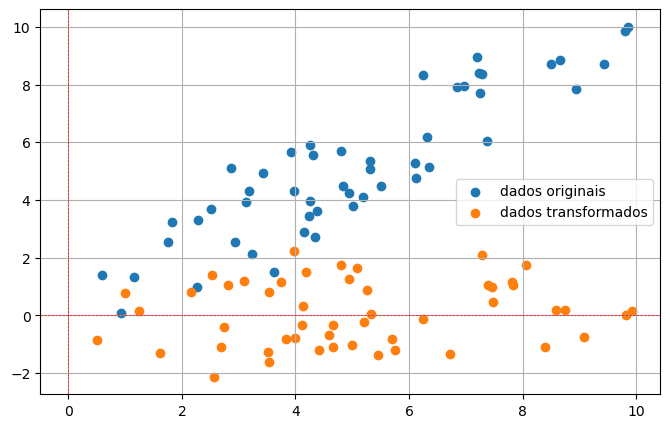

In [12]:
# Visualização gráfica (média e a diferença)

fig = plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)

plt.scatter(df.p1, df.p2, label='dados originais')
plt.scatter(df_transf['média'], df_transf['diferença'], label='dados transformados')
ax.axhline(y=0, color='red', ls='--', lw=.5)
ax.axvline(x=0, color='red', ls='--', lw=.5)


ax.grid()
plt.legend()
plt.show()

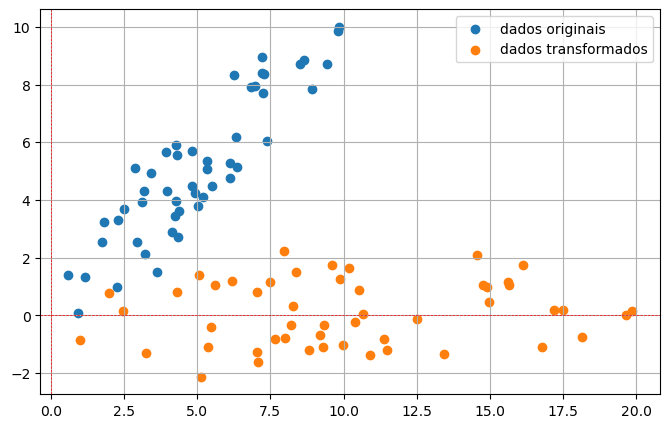

In [13]:
# Visualização gráfica (soma e a diferença/evolução)

fig = plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)

plt.scatter(df.p1, df.p2, label='dados originais')
plt.scatter(df_transf2['soma'], df_transf2['diferença/evolução'], label='dados transformados')
ax.axhline(y=0, color='red', ls='--', lw=.5)
ax.axvline(x=0, color='red', ls='--', lw=.5)


ax.grid()
plt.legend()
plt.show()

##### Considerando uma análise relacionando a média e a soma 

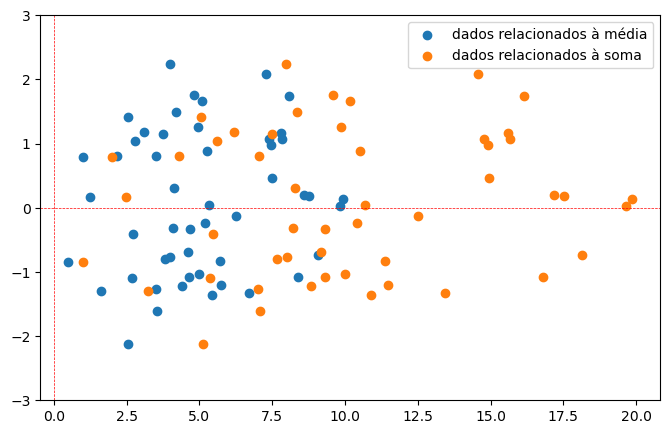

In [15]:
# Visualização gráfica 

fig = plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
ax.set(ylim=(-3, 3))

plt.scatter(df_transf['média'], df_transf['diferença'], label='dados relacionados à média')
plt.scatter(df_transf2['soma'], df_transf2['diferença/evolução'], label='dados relacionados à soma')
ax.axhline(y=0, color='red', ls='--', lw=.5)
ax.axvline(x=0, color='red', ls='--', lw=.5)


# ax.grid()
plt.legend()
plt.show()

Neste último painel podemos confirmar que o gráfico da soma é proporcional ao da média. É como se a soma fosse a média "esticada" por um fator `2`, uma vez que a média é dada pela soma das notas das provas dividida pelo número de provas, ou seja, 
$$
média=\frac{p1+p2}{2}.
$$
Pela relação acima fica evidente o fator `2` que gera a impressão de "esticar" quando olhamos para o gráfico da soma.

Avaliando também a correlção, obtemos:

In [38]:
df_transf2[['soma', 'diferença/evolução']].corr()

,soma,diferença/evolução
soma,1.000000,0.133474
diferença/evolução,0.133474,1.000000


In [40]:
df_transf[['média', 'diferença']].corr()

,média,diferença
média,1.000000,0.133474
diferença,0.133474,1.000000


Desta forma, fica claro que a correlação associada aos dados da média e da soma são iguais, ou seja, apenas o fator constante (.5) os diferencia.